In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
Fraud_check = pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 14 on Decision trees\\Fraud_check.csv")

In [3]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## understanding the data

In [4]:
Fraud_check.shape

(600, 6)

In [5]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
Fraud_check.isnull().sum()    ## there are no null values in the given data


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Data preprocessing

In [7]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['Marital.Status']= label_encoder.fit_transform(Fraud_check['Marital.Status'])

In [8]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO


In [9]:
dummys=pd.get_dummies(Fraud_check.Urban)
dummys

,NO,YES
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
595,0,1
596,0,1
597,0,1
598,1,0


In [10]:
merged = pd.concat([Fraud_check,dummys],axis='columns')

In [11]:
merged

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,NO,YES
0,NO,2,68833,50047,10,YES,0,1
1,YES,0,33700,134075,18,YES,0,1
2,NO,1,36925,160205,30,YES,0,1
3,YES,2,50190,193264,15,YES,0,1
4,NO,1,81002,27533,28,NO,1,0
...,...,...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES,0,1
596,YES,0,69967,55369,2,YES,0,1
597,NO,0,47334,154058,0,YES,0,1
598,YES,1,98592,180083,17,NO,1,0


In [12]:
Fraud_check=merged.drop(['Undergrad','NO'],axis='columns')
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,YES
0,2,68833,50047,10,YES,1
1,0,33700,134075,18,YES,1
2,1,36925,160205,30,YES,1
3,2,50190,193264,15,YES,1
4,1,81002,27533,28,NO,0
...,...,...,...,...,...,...
595,0,76340,39492,7,YES,1
596,0,69967,55369,2,YES,1
597,0,47334,154058,0,YES,1
598,1,98592,180083,17,NO,0


In [13]:
Fraud_check.rename(columns={'YES':'Undergrad'},inplace=True)

In [14]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad
0,2,68833,50047,10,YES,1
1,0,33700,134075,18,YES,1
2,1,36925,160205,30,YES,1
3,2,50190,193264,15,YES,1
4,1,81002,27533,28,NO,0
...,...,...,...,...,...,...
595,0,76340,39492,7,YES,1
596,0,69967,55369,2,YES,1
597,0,47334,154058,0,YES,1
598,1,98592,180083,17,NO,0


In [15]:
dummys=pd.get_dummies(Fraud_check.Urban)
dummys

,NO,YES
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
595,0,1
596,0,1
597,0,1
598,1,0


In [16]:
merged = pd.concat([Fraud_check,dummys],axis='columns')

In [17]:
merged

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad,NO,YES
0,2,68833,50047,10,YES,1,0,1
1,0,33700,134075,18,YES,1,0,1
2,1,36925,160205,30,YES,1,0,1
3,2,50190,193264,15,YES,1,0,1
4,1,81002,27533,28,NO,0,1,0
...,...,...,...,...,...,...,...,...
595,0,76340,39492,7,YES,1,0,1
596,0,69967,55369,2,YES,1,0,1
597,0,47334,154058,0,YES,1,0,1
598,1,98592,180083,17,NO,0,1,0


In [18]:
Fraud_check=merged.drop(['Urban','YES'],axis='columns')
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,NO
0,2,68833,50047,10,1,0
1,0,33700,134075,18,1,0
2,1,36925,160205,30,1,0
3,2,50190,193264,15,1,0
4,1,81002,27533,28,0,1
...,...,...,...,...,...,...
595,0,76340,39492,7,1,0
596,0,69967,55369,2,1,0
597,0,47334,154058,0,1,0
598,1,98592,180083,17,0,1


In [19]:
Fraud_check.rename(columns={'NO':'Urban'},inplace=True)

In [20]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,Urban
0,2,68833,50047,10,1,0
1,0,33700,134075,18,1,0
2,1,36925,160205,30,1,0
3,2,50190,193264,15,1,0
4,1,81002,27533,28,0,1
...,...,...,...,...,...,...
595,0,76340,39492,7,1,0
596,0,69967,55369,2,1,0
597,0,47334,154058,0,1,0
598,1,98592,180083,17,0,1


In [21]:
Fraud_check['Taxable.Income']=Fraud_check['Taxable.Income'].map(lambda x:'risky' if x<30000 else 'good')

In [22]:
Fraud_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,Urban
0,2,good,50047,10,1,0
1,0,good,134075,18,1,0
2,1,good,160205,30,1,0
3,2,good,193264,15,1,0
4,1,good,27533,28,0,1
...,...,...,...,...,...,...
595,0,good,39492,7,1,0
596,0,good,55369,2,1,0
597,0,good,154058,0,1,0
598,1,good,180083,17,0,1


### converting data into X and Y

In [23]:
X =Fraud_check.drop("Taxable.Income",axis=1)
Y = Fraud_check['Taxable.Income']

In [24]:
X

,Marital.Status,City.Population,Work.Experience,Undergrad,Urban
0,2,50047,10,1,0
1,0,134075,18,1,0
2,1,160205,30,1,0
3,2,193264,15,1,0
4,1,27533,28,0,1
...,...,...,...,...,...
595,0,39492,7,1,0
596,0,55369,2,1,0
597,0,154058,0,1,0
598,1,180083,17,0,1


In [25]:
Y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: object

## converting data into train_test_split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=12)

In [27]:
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
y_train_pred=dt_model.predict(X_train)

In [29]:
y_test_pred=dt_model.predict(X_test)

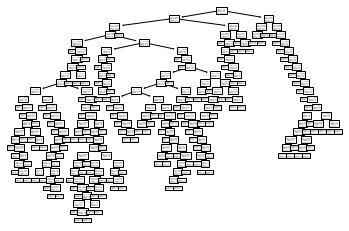

In [30]:
tree.plot_tree(dt_model);

### checking train accuracy

In [31]:
accuracy_score(Y_train,y_train_pred)

1.0

In [32]:
confusion_matrix(Y_train,y_train_pred)

array([[369,   0],
       [  0, 111]], dtype=int64)

#### Checking accuracy for test for test data

In [33]:
accuracy_score(Y_test,y_test_pred)

0.675

In [34]:
confusion_matrix(Y_test,y_test_pred)

array([[77, 30],
       [ 9,  4]], dtype=int64)

#### checking actual value&predicted value

In [35]:
final=pd.DataFrame({'Actual':Y_test,'Predicted':y_test_pred})

In [36]:
final

,Actual,Predicted
326,risky,good
360,good,good
348,good,good
567,risky,risky
244,good,good
...,...,...
554,good,good
472,good,good
540,risky,risky
531,good,good


### After comparing train accuracy and test accuracy, I got know the model for over fit,by using GRID SEARCH cv method trying to improve model

In [37]:
from sklearn.model_selection import GridSearchCV

In [39]:
gridsearch=GridSearchCV(estimator=dt_model,param_grid={'max_depth':[3,4,5,6]},cv=None,)
gridsearch.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 4, 5, 6]})

In [40]:
gridsearch.best_params_

{'max_depth': 3}

# Decision Tree assignment 2

In [41]:
company =pd.read_csv('C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 14 on Decision trees\\Company_Data.csv')

In [42]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [43]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [45]:
company.shape

(400, 11)

In [46]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [47]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [48]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [49]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['ShelveLoc'].astype('category')


In [50]:
company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [51]:
label_encoder = preprocessing.LabelEncoder()
company['US']= label_encoder.fit_transform(company['US'])

In [52]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])

In [53]:
dummys = pd.get_dummies(company.Urban)

In [54]:
dummys

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
395,0,1
396,1,0
397,0,1
398,0,1


In [55]:
merged =pd.concat([Fraud_check,dummys],axis='columns')

In [56]:
merged

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad,Urban,No,Yes
0,2,good,50047,10,1,0,0.0,1.0
1,0,good,134075,18,1,0,0.0,1.0
2,1,good,160205,30,1,0,0.0,1.0
3,2,good,193264,15,1,0,0.0,1.0
4,1,good,27533,28,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...
595,0,good,39492,7,1,0,NaN,NaN
596,0,good,55369,2,1,0,NaN,NaN
597,0,good,154058,0,1,0,NaN,NaN
598,1,good,180083,17,0,1,NaN,NaN


In [57]:
merged = pd.concat([company,dummys],axis='columns')
merged

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,No,Yes
0,9.50,138,73,11,276,120,0,42,17,Yes,0,0,1
1,11.22,111,48,16,260,83,1,65,10,Yes,1,0,1
2,10.06,113,35,10,269,80,2,59,12,Yes,2,0,1
3,7.40,117,100,4,466,97,2,55,14,Yes,2,0,1
4,4.15,141,64,3,340,128,0,38,13,Yes,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,1,0,1
396,6.14,139,23,3,37,120,2,55,11,No,2,1,0
397,7.41,162,26,12,368,159,2,40,18,Yes,2,0,1
398,5.94,100,79,7,284,95,0,50,12,Yes,0,0,1


In [58]:
company=merged.drop(['Urban','Yes'],axis='columns')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,No
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,1,65,10,1,0
2,10.06,113,35,10,269,80,2,59,12,2,0
3,7.40,117,100,4,466,97,2,55,14,2,0
4,4.15,141,64,3,340,128,0,38,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,0
396,6.14,139,23,3,37,120,2,55,11,2,1
397,7.41,162,26,12,368,159,2,40,18,2,0
398,5.94,100,79,7,284,95,0,50,12,0,0


In [59]:
company['Sales']=company['Sales'].map(lambda x:1 if x>8 else 0)
company['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [60]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,No
0,1,138,73,11,276,120,0,42,17,0,0
1,1,111,48,16,260,83,1,65,10,1,0
2,1,113,35,10,269,80,2,59,12,2,0
3,0,117,100,4,466,97,2,55,14,2,0
4,0,141,64,3,340,128,0,38,13,0,0


In [61]:
X=company.drop(labels='Sales',axis=1)
y=company[['Sales']]

In [62]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,No
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,1,0
2,113,35,10,269,80,2,59,12,2,0
3,117,100,4,466,97,2,55,14,2,0
4,141,64,3,340,128,0,38,13,0,0


In [63]:
y.head()

,Sales
0,1
1,1
2,1
3,0
4,0


In [64]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=12)

## model building

In [65]:
dt_model =DecisionTreeClassifier(criterion = 'gini',max_depth=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [66]:
y_train_pred=dt_model.predict(X_train)

In [67]:
y_test_pred=dt_model.predict(X_test)

## checking matrix

In [68]:
accuracy_score(y_train,y_train_pred)

0.99375

In [69]:
confusion_matrix(y_train,y_train_pred)

array([[187,   0],
       [  2, 131]], dtype=int64)

## Checking accuracy for test data

In [70]:
accuracy_score(y_test,y_test_pred)

0.6875

In [71]:
confusion_matrix(y_test,y_test_pred)

array([[36, 13],
       [12, 19]], dtype=int64)